In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


#https://www.datacamp.com/community/tutorials/xgboost-in-python

In [2]:
fingerprint_df = pd.read_csv("~/GitHub/ML-assignments/Assignment-1/final_dataset_v1.csv")
fingerprint_df

,fingerprint,minutia,r15,r30,r45,r60,r75,r90,l1,l2,...,beta7r,beta8,beta8r,beta9,beta9r,beta10,beta10r,beta11,beta11r,score_change
0,B101X9I_1_1,v0,0,1,3,8,10,11,1,2,...,32.000000,77.000000,-70.716815,56.000000,-49.716815,284.000000,-277.716815,-5.716815,12.000000,0
1,B101X9I_1_1,v1,0,0,3,4,5,9,0,3,...,-99.716815,2.000000,4.283185,81.000000,-74.716815,297.000000,-290.716815,69.000000,-62.716815,0
2,B101X9I_1_1,v2,0,1,1,1,3,3,1,0,...,-289.716815,140.000000,-133.716815,1.000000,5.283185,80.000000,-73.716815,68.000000,-61.716815,1
3,B101X9I_1_1,v3,1,3,5,7,8,9,2,2,...,-288.716815,4.283185,2.000000,181.000000,-174.716815,-14.716815,21.000000,5.283185,1.000000,1
4,B101X9I_1_1,v4,0,1,1,1,1,3,1,0,...,-306.716815,157.000000,-150.716815,18.000000,-11.716815,97.000000,-90.716815,85.000000,-78.716815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236,U300X2I_1_1,v13,0,0,2,4,8,12,0,2,...,-209.716815,217.000000,-210.716815,30.000000,-23.716815,-105.716815,112.000000,5.000000,1.283185,0
5237,U300X2I_1_1,v14,2,3,5,9,10,13,1,2,...,-190.716815,182.000000,-175.716815,222.000000,-215.716815,4.283185,2.000000,169.000000,-162.716815,0
5238,U300X2I_1_1,v15,1,2,3,6,9,12,1,1,...,-175.716815,197.000000,-190.716815,222.000000,-215.716815,169.000000,-162.716815,4.283185,2.000000,1
5239,U300X2I_1_1,v16,0,1,5,12,14,17,1,4,...,-217.716815,-97.716815,104.000000,-6.716815,13.000000,13.000000,-6.716815,225.000000,-218.716815,0


In [3]:
X, y = fingerprint_df.iloc[:,: 2:-1],fingerprint_df.iloc[:,-1]

data_dmatrix = xgb.DMatrix(data=X,label=y)



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [5]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5,
                          alpha = 10,
                          n_estimators = 10)

In [6]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[01:03:30] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [7]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.288098


In [8]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[01:03:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.450602,4.714045e-07,0.450601,0.000002
1,0.432460,1.861198e-02,0.432977,0.018977
2,0.428158,1.882523e-02,0.429517,0.019036
3,0.385997,1.696864e-02,0.387360,0.017188
4,0.370503,1.714251e-02,0.372550,0.017103


In [10]:
print((cv_results["test-rmse-mean"]).tail(1))


49    0.147873
Name: test-rmse-mean, dtype: float64


In [11]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


[01:03:33] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:03:34] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


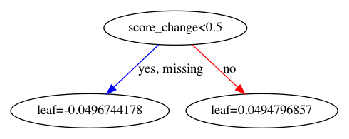

In [12]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

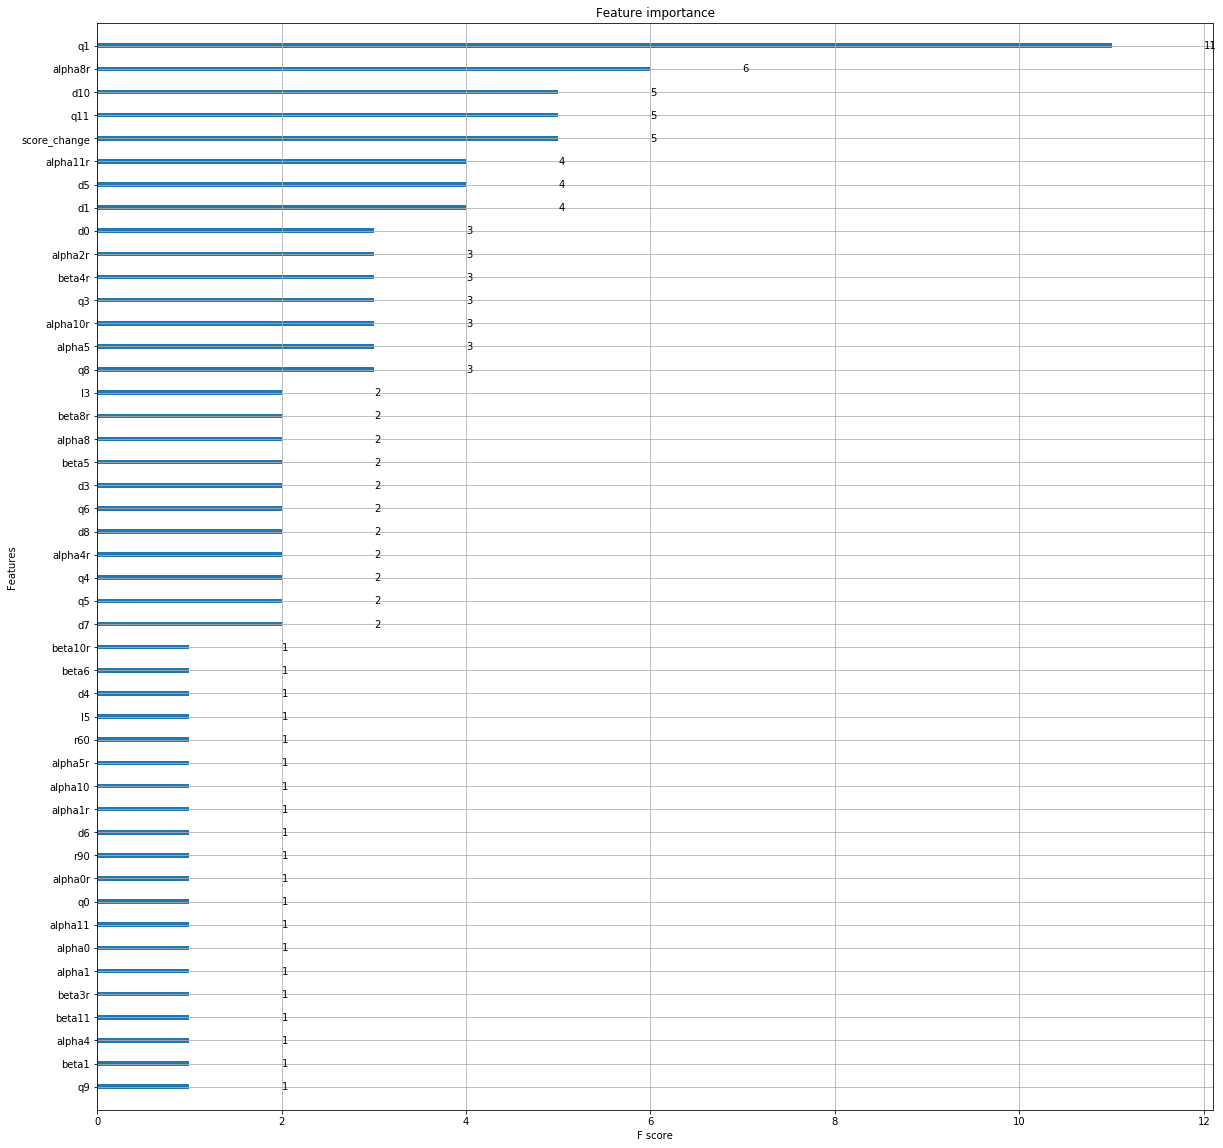

In [15]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()